In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.metrics import average_precision_score
from sklearn.utils import shuffle

from pycaret.classification import *

import mlflow
from mlflow.models import infer_signature


from infra_utils import get_raw_data

In [2]:
data_file = ('dataset' +  os.path.sep +  'creditcard.csv')
data_file

'dataset\\creditcard.csv'

In [3]:
df = pd.read_csv(data_file)

In [4]:
# df.head()

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Under Sampling

In [6]:
df_train, df_test = get_raw_data(df)

In [7]:
df_train['target'].value_counts()

target
0    1916
1     321
Name: count, dtype: int64

In [8]:
df_test['target'].value_counts()

target
0    932
1    171
Name: count, dtype: int64

## Create new models by py caret

In [9]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core'
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,5353
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(2237, 31)"
5,Transformed train set shape,"(1565, 31)"
6,Transformed test set shape,"(672, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


2024/08/02 11:56:49 INFO mlflow.tracking.fluent: Experiment with name 'ml_core' does not exist. Creating a new experiment.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9783,0.9820,0.8585,0.9895,0.9182,0.9058,0.9096,0.9537,0.0980
rf,Random Forest Classifier,0.9777,0.9756,0.8585,0.9839,0.9161,0.9033,0.9066,0.9427,0.2060
catboost,CatBoost Classifier,0.9776,0.9835,0.8585,0.9847,0.9159,0.9031,0.9068,0.9568,4.1210
lightgbm,Light Gradient Boosting Machine,0.9770,0.9769,0.8585,0.9804,0.9137,0.9006,0.9043,0.9460,0.2220
gbc,Gradient Boosting Classifier,0.9738,0.9792,0.8674,0.9465,0.9043,0.8893,0.8910,0.9389,0.5770
lr,Logistic Regression,0.9725,0.9675,0.8759,0.9307,0.9009,0.8850,0.8865,0.9340,1.4600
ada,Ada Boost Classifier,0.9674,0.9647,0.8403,0.9264,0.8802,0.8614,0.8635,0.9330,0.1680
lda,Linear Discriminant Analysis,0.9649,0.9735,0.7694,0.9836,0.8624,0.8427,0.8516,0.9330,0.0180
dt,Decision Tree Classifier,0.9591,0.9229,0.8719,0.8517,0.8600,0.8361,0.8373,0.7620,0.0280
ridge,Ridge Classifier,0.9553,0.9735,0.7022,0.9820,0.8177,0.7931,0.8082,0.0000,0.0170


2024/08/02 11:58:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:58:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:58:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:58:10 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:58:10 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:58:11 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

CPU times: total: 23 s
Wall time: 1min 33s


In [10]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5353, verbose=0,
                     warm_start=False)

## Fix Imbalance

In [11]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core',
             fix_imbalance=True
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,6416
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(3352, 31)"
5,Transformed train set shape,"(2680, 31)"
6,Transformed test set shape,"(672, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9783,0.9855,0.8623,0.9852,0.9171,0.9048,0.9090,0.9612,0.1270
lightgbm,Light Gradient Boosting Machine,0.9764,0.9861,0.8806,0.9527,0.9133,0.8997,0.9019,0.9646,0.2320
catboost,CatBoost Classifier,0.9757,0.9865,0.8806,0.9462,0.9110,0.8970,0.8986,0.9644,4.0620
rf,Random Forest Classifier,0.9751,0.9848,0.8715,0.9526,0.9082,0.8939,0.8964,0.9548,0.2490
ada,Ada Boost Classifier,0.9706,0.9753,0.8850,0.9115,0.8953,0.8782,0.8802,0.9493,0.2320
gbc,Gradient Boosting Classifier,0.9706,0.9797,0.8761,0.9214,0.8946,0.8776,0.8804,0.9494,0.9120
lr,Logistic Regression,0.9681,0.9707,0.8982,0.8868,0.8900,0.8714,0.8731,0.9425,0.1390
lda,Linear Discriminant Analysis,0.9591,0.9689,0.8447,0.8743,0.8556,0.8319,0.8344,0.9050,0.0490
ridge,Ridge Classifier,0.9578,0.9716,0.8358,0.8734,0.8510,0.8266,0.8289,0.0000,0.0470
nb,Naive Bayes,0.9527,0.9686,0.7423,0.9151,0.8174,0.7907,0.7978,0.8800,0.0460


2024/08/02 11:29:37 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:29:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:29:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:29:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:29:39 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 11:29:39 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

CPU times: total: 13.8 s
Wall time: 1min 16s


## More Options

In [12]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
            target='target',
             # silent=True,
             log_experiment=True,
             use_gpu=False,
             experiment_name='ml_core_more_ops',
             fix_imbalance=True,
             remove_outliers=True,
             transformation=True,
             # transformation_method=
             feature_interaction=True,
             feature_ratio=True,
             polynomial_features=True,
             feature_selection=True, 
             feature_selection_threshold=0.5,
             remove_multicollinearity=True,
             pca=True,
             pca_components=10,
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

TypeError: setup() got an unexpected keyword argument 'feature_interaction'

## Final Model
#### keep best parameters

In [18]:
%%time

# pycaret.classification library:

clf1 = setup(data=df_train,
             verbose=True,
             target='target',
             log_experiment=True,
             use_gpu=False,
             experiment_name='Final_Model',
             fix_imbalance=True,
             # transformation=True, error
             polynomial_features=True,
             # feature_selection=True, error
             remove_multicollinearity=True,
             multicollinearity_threshold=0.6,
             pca=False
             
            )


add_metric(id='apc', name='APC', score_func=average_precision_score, target='pred_proba')

best_model = compare_models()

,Description,Value
0,Session id,6638
1,Target,target
2,Target type,Binary
3,Original data shape,"(2237, 31)"
4,Transformed data shape,"(3352, 69)"
5,Transformed train set shape,"(2680, 69)"
6,Transformed test set shape,"(672, 69)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
catboost,CatBoost Classifier,0.9655,0.9649,0.8542,0.9026,0.8756,0.8557,0.8575,0.9225,8.9570
rf,Random Forest Classifier,0.9617,0.9650,0.8318,0.8939,0.8607,0.8386,0.8400,0.9160,0.8620
et,Extra Trees Classifier,0.9617,0.9717,0.8010,0.9216,0.8553,0.8334,0.8373,0.9208,0.5710
lightgbm,Light Gradient Boosting Machine,0.9617,0.9679,0.8409,0.8877,0.8614,0.8393,0.8412,0.9254,0.8280
gbc,Gradient Boosting Classifier,0.9553,0.9622,0.8630,0.8340,0.8459,0.8199,0.8216,0.9150,2.6040
qda,Quadratic Discriminant Analysis,0.9527,0.8888,0.7615,0.8983,0.8191,0.7924,0.7990,0.8006,0.4680
ada,Ada Boost Classifier,0.9463,0.9511,0.8227,0.8093,0.8123,0.7811,0.7836,0.8954,0.9240
ridge,Ridge Classifier,0.9252,0.9131,0.7737,0.7294,0.7464,0.7028,0.7062,0.0000,0.4750
lda,Linear Discriminant Analysis,0.9252,0.9146,0.7783,0.7344,0.7487,0.7052,0.7103,0.7915,0.4640
dt,Decision Tree Classifier,0.9240,0.8800,0.8182,0.7103,0.7573,0.7128,0.7174,0.6092,0.5240


2024/08/02 12:19:29 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 12:19:29 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 12:19:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 12:19:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 12:19:31 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 12:19:31 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

CPU times: total: 1min 34s
Wall time: 3min 42s


In [21]:
best_model

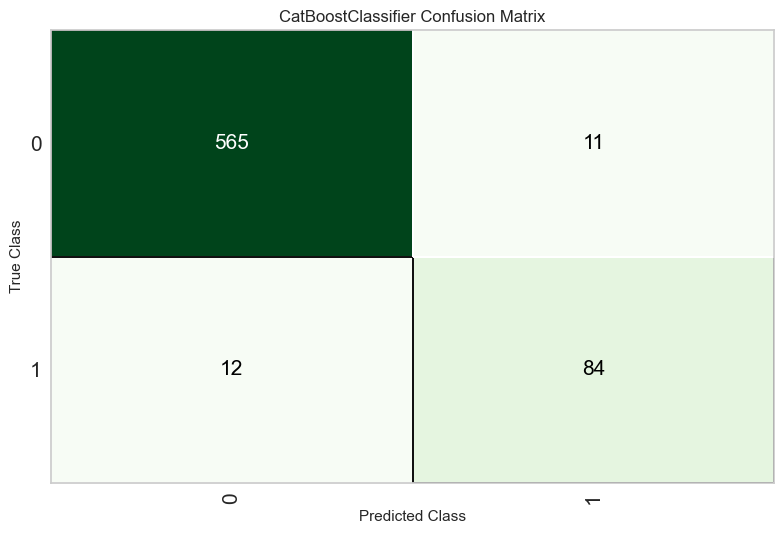

In [20]:
plot_model(best_model, plot = 'confusion_matrix')